In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import matplotlib
matplotlib.style.use('seaborn')
%matplotlib inline

In [5]:
test_data=pd.read_csv('titanic_test.csv')
train_data=pd.read_csv('titanic_train.csv')

In [9]:
#EXPLORATORY ANALYSIS

In [10]:
test_data.shape

(418, 11)

In [11]:
train_data.shape

(891, 12)

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [16]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#MISSING DATA

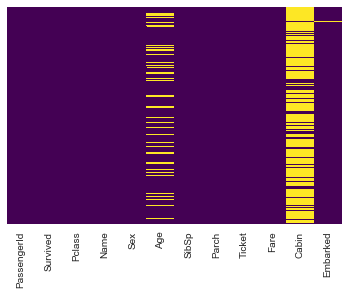

In [21]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
#OTHER COLUMNS

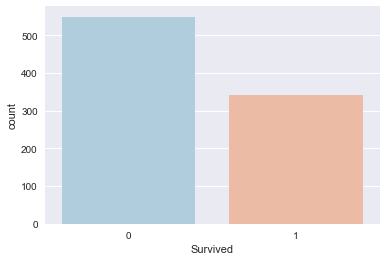

In [27]:
sns.countplot(x='Survived',data=train_data,palette='RdBu_r')

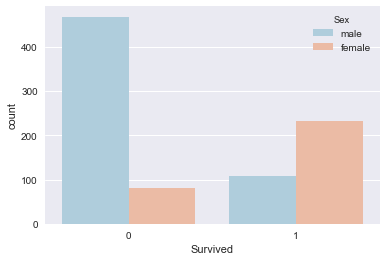

In [29]:
sns.countplot(x='Survived',data=train_data,palette='RdBu_r',hue='Sex')

In [32]:
train_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

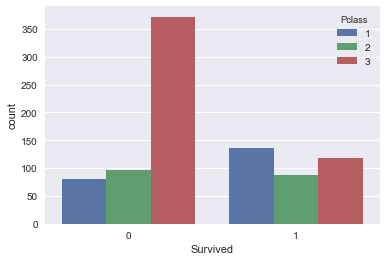

In [35]:
sns.countplot(x='Survived',data=train_data,hue='Pclass')

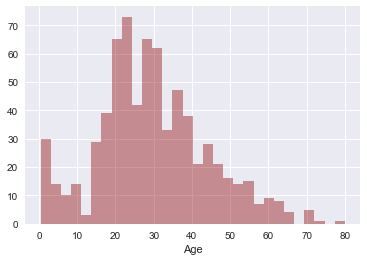

In [37]:
sns.distplot(train_data['Age'].dropna(),kde=False,color='darkred',bins=30)

In [38]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

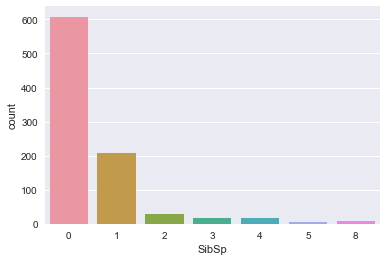

In [39]:
sns.countplot(x='SibSp',data=train_data)

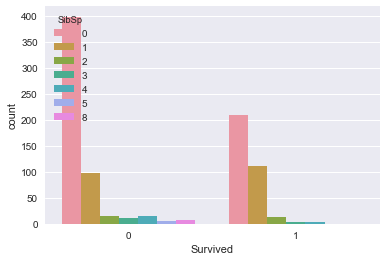

In [40]:
sns.countplot(x='Survived',data=train_data,hue='SibSp')

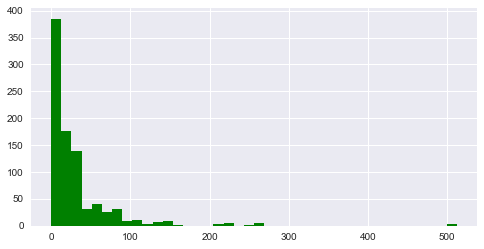

In [41]:
train_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [43]:
#DATA CLEANING
#FILLING MISSING AGE VALUES BY AVERAGE AGE PER CLASS

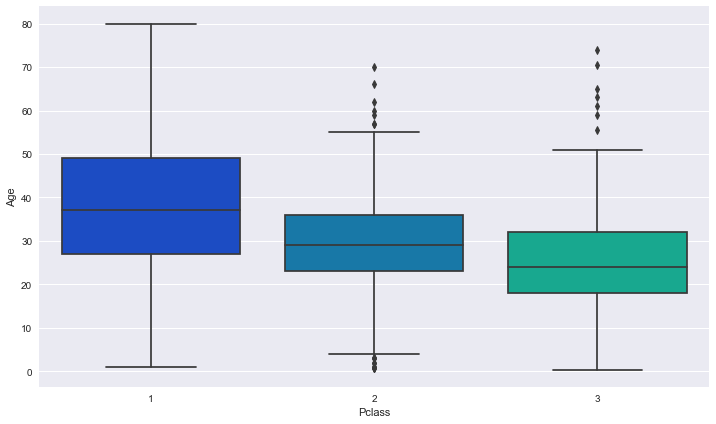

In [45]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_data,palette='winter')

In [46]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [48]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

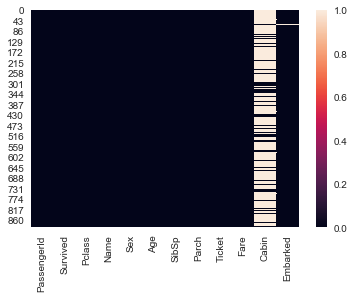

In [50]:
sns.heatmap(train_data.isnull())

In [51]:
train_data.drop('Cabin',axis=1,inplace=True)

In [53]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
train_data.dropna(inplace=True)

In [55]:
len(train_data)

889

In [56]:
#CONVERTING CATEGORICAL FEATURED INTO DUMMY VARIABLES

In [58]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [59]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [60]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [61]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [63]:
train_data = pd.concat([train_data,sex,embark],axis=1)

In [64]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [65]:
#BUILDING LOGISTIC REGRESSION MODEL

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(train_data.drop('Survived',axis=1), 
                                                    train_data['Survived'], test_size=0.20, 
                                                    random_state=101)

In [68]:
logmodel = LogisticRegression()
logmodel.fit(xtrain,ytrain)

C:\Users\Ayush Hans\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
predictions = logmodel.predict(xtest)

In [79]:
classi=classification_report(ytest,predictions)
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       107
           1       0.85      0.63      0.73        71

    accuracy                           0.81       178
   macro avg       0.82      0.78      0.79       178
weighted avg       0.81      0.81      0.80       178



In [102]:
print('Weighted Score: '+ str((81+81+80)/3.0) +'%')

Weighted Score: 80.66666666666667%
